## Data Mining and Sentiment Analysis using NLTK

In [1597]:
#Import necessary modules 
import sqlite3 
import pandas as pd
import nltk


In [1598]:
#Connect to sqlite database 'newArticle.db'
conn = sqlite3.connect("newsArticle.db")

In [1599]:
# Import scraped data columns 'topic' and 'body'.
df_1=pd.read_sql_query("select topic,body from articles",conn)
df_1.info()

#pd.options.mode.chained_assignment Can be set to None, "warn", or "raise". "warn" is the default.
# None will suppress the warning entirely, and "raise" will throw a SettingWithCopyError
pd.options.mode.chained_assignment = None

#Delete duplicate rows based on 'body' column. We use this copy of the data frame in the analysis in the rows below.
df=df_1.drop_duplicates(subset=['body'], keep=False)
print(len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   165 non-null    object
 1   body    165 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB
117


In [1600]:
# Data transformation
# the astype() metod transforms the data into strings
df['body'] = df['body'].astype(str).str.lower()
print(len(df['body']))
df.head(5)



117


,topic,body
14,Election,when jair bolsonaro lost his bid for re-electi...
15,Election,"the last time voters in la goulette, a suburb ..."
16,Election,"for luiz inácio lula da silva, brazil’s leftis..."
17,Election,"despite its name, the palace of parliament in ..."
18,Election,"on december 4th, eight days after honduras hel..."


### Tokenization

In [1601]:
#Tokenization is splitting up body of the text into smaller lines and words.
# NLTK’s RegexpTokenizer imported and used to perform tokenization in combination with regular expressions.
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Stop words are words in a stop list which are dropped before analysing natural language data since they don’t contain valuable information (like “will”, “and”, “or”, “has”, …).
nltk.download('stopwords')

# Make a list of english stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
print(len(stop_words))

# Extend the list with own custom stopwords
my_stopwords = ['https','could','years','not','prices','price','would','can','thursday','monday','wednesday','central','people']
stop_words.update(my_stopwords)
print(len(stop_words))

# \w+ matches 1 or more word characters (same as [a-zA-Z0-9_]+).This means most characters that can be part of a word in any language, as well as numbers and the underscore.
regexp = RegexpTokenizer('\w+')
df['body_token']=df['body'].apply(regexp.tokenize)

#Remove stopwords from the scraped articles
df['body_token'] = df['body'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])
print(df['body_token'])


{'during', 'needn', 'until', "weren't", 's', 'ain', 'them', 'of', 'being', 'in', 'their', 'a', "you'll", 'doesn', 'to', 'here', 'had', 'do', 'with', 'just', 'o', 'won', 'we', 'y', 'our', 'which', 'ourselves', "that'll", 'as', 'nor', 'down', 'his', 'were', 'the', 'those', 'there', 'll', 'theirs', "you're", 'shouldn', 'haven', 'all', 'her', "it's", 'has', 'shan', 'against', 'm', "mustn't", 're', 'if', 'mustn', 'what', 'yourselves', 'don', 'above', 'each', "won't", "you'd", 'am', 'some', 'aren', 'wouldn', 'from', 'himself', "couldn't", 'into', "shouldn't", 'too', 'themselves', 'hasn', "needn't", 'him', 'my', 'me', 'about', 'now', 'again', 'own', "she's", 'mightn', 'does', 'after', 'who', 'ours', 'because', 'couldn', 'ma', 'yours', 'have', 'isn', 'been', "doesn't", 'be', 'on', 'between', 'below', 'whom', "wouldn't", 'and', 'should', 'she', 'that', 'not', 'hers', "should've", 'very', 'up', 'an', 'this', 'how', 'no', 'd', 'he', 'but', 'where', 'they', 'are', 'by', 'for', 'then', 'will', 'wer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


14     [jair, bolsonaro, lost, bid, october, said, no...
15     [last, time, voters, la, goulette, suburb, tun...
16     [luiz, inácio, lula, da, silva, brazil, leftis...
17     [despite, name, palace, parliament, centre, bu...
18     [december, eight, days, honduras, held, genera...
                             ...                        
146    [lima, july, reuters, peru, bank, boosted, bor...
149    [ukrainian, refugees, safe, peace, year, warby...
150    [president, bidenelection, coveragecongresssup...
153    [economyfinancial, marketscautious, steady, co...
163    [key, developments, aftermath, turkey, syria, ...
Name: body_token, Length: 117, dtype: object


In [1602]:
#Remove infrequent words.
# First change the format of body_token to strings and keep only words which are longer than 5 letters
df['body_string'] = df['body_token'].apply(lambda x: ' '.join([item for item in x if len(item)>5]))

# Prints the row article text, token and strings which contain more than 5 letters 
df[['body', 'body_token', 'body_string']].head()

,body,body_token,body_string
14,when jair bolsonaro lost his bid for re-electi...,"[jair, bolsonaro, lost, bid, october, said, no...",bolsonaro october nothing explicitly reject re...
15,"the last time voters in la goulette, a suburb ...","[last, time, voters, la, goulette, suburb, tun...",voters goulette suburb tunisian capital repres...
16,"for luiz inácio lula da silva, brazil’s leftis...","[luiz, inácio, lula, da, silva, brazil, leftis...",inácio brazil leftist former president disappo...
17,"despite its name, the palace of parliament in ...","[despite, name, palace, parliament, centre, bu...",despite palace parliament centre bucharest rom...
18,"on december 4th, eight days after honduras hel...","[december, eight, days, honduras, held, genera...",december honduras general elections country el...


In [1603]:
#Create a list of all words longer than 5 letter as specified above. 
all_words = ' '.join([word for word in df['body_string']])

#Tokenize the new article strings list created.
tokenized_words = nltk.tokenize.word_tokenize(all_words)


In [1604]:
# Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist


FreqDist({'inflation': 916, 'interest': 470, 'policy': 224, 'economic': 203, 'market': 197, 'higher': 189, 'economy': 168, 'monetary': 160, 'turkey': 148, 'income': 148, ...})

In [1605]:
# We can use our fdist dictionary to drop words which occur less than a certain amount of times (usually a value of 3 or 4 but we use 10 here).

df['body_string_fdist'] = df['body_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 10 ]))
df[['body', 'body_token', 'body_string', 'body_string_fdist']].head()

,body,body_token,body_string,body_string_fdist
14,when jair bolsonaro lost his bid for re-electi...,"[jair, bolsonaro, lost, bid, october, said, no...",bolsonaro october nothing explicitly reject re...,bolsonaro october nothing result though either...
15,"the last time voters in la goulette, a suburb ...","[last, time, voters, la, goulette, suburb, tun...",voters goulette suburb tunisian capital repres...,voters capital parliament parties candidates r...
16,"for luiz inácio lula da silva, brazil’s leftis...","[luiz, inácio, lula, da, silva, brazil, leftis...",inácio brazil leftist former president disappo...,brazil former president result supporters majo...
17,"despite its name, the palace of parliament in ...","[despite, name, palace, parliament, centre, bu...",despite palace parliament centre bucharest rom...,despite parliament capital democracy compariso...
18,"on december 4th, eight days after honduras hel...","[december, eight, days, honduras, held, genera...",december honduras general elections country el...,december general elections country electoral c...


## Lemmatization

In [1606]:

# Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a 
# single item, identified by the word's lemma, or dictionary form.[Wikipedia]

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
df['body_string_lem'] = df['body_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal. This is to make sure that there are words to lemmatize.
df['is_equal']= (df['body_string_fdist']==df['body_string_lem'])

# show level count. Returns true and prints number of rows if the rows in every column is equal
df.is_equal.value_counts()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True    117
Name: is_equal, dtype: int64

## Frequency distribution

In [1607]:
from nltk.probability import FreqDist
nltk.download('punkt')

#a new variable assigned to all lematized words
all_words_lem = ' '.join([word for word in df['body_string_lem']])
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1608]:
#Tokenize lematized words and display frequency distribution.
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

#Display most common words in the lematized word cluster
fd.most_common(5)
fd.tabulate(5)

inflation  interest    policy  economic    market 
      916       470       224       203       197 


## Plot search words against their frequency of occurences in Plotly.
#### Add search words here if necessary

In [1609]:
#Import plotly and plot the occurences of search words in the tokenized word list. 
#Import matplotlib and plot the occurences of searchwords in the tokenized word list. 
#The maximum value of 30 words to plot is given
import plotly.express as px
import matplotlib.pyplot as plt

topic_words = ['Resources','interest','rate','inflation','election,','corruption','drought','extreme temperatures'] # Add your topic words here

fdist = FreqDist([word for words in df['body_token'].values.tolist() for word in words if word in topic_words])

# Create pandas series to make plotting easier.Notice the tuples are converted to dict
freqdist = pd.Series(dict(fdist))
print(freqdist)

fig = px.bar(y=freqdist.index, x=freqdist.values, 
                title="Search words occurency frequency").update_layout(xaxis_title="Occurency frequency", yaxis_title="Search word")

# Sort values in ascending order
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

#Update the title of the graph to center
fig.update_layout(title_text='Search words occurency frequency', title_x=0.5)

# show plot
fig.show()

inflation     916
corruption     61
rate          485
interest      470
drought         1
dtype: int64


## Plot the most common words in Plotly

In [1610]:
# Obtain top 10 words from the frequency distribution and return as tuples
top_10 = fd.most_common(10)
print(top_10)

# Create pandas series to make plotting easier.Notice the tuples are converted to dict
fdist = pd.Series(dict(top_10))

[('inflation', 916), ('interest', 470), ('policy', 224), ('economic', 203), ('market', 197), ('higher', 189), ('economy', 168), ('monetary', 160), ('turkey', 148), ('income', 148)]


In [1611]:
# Plot most frequent words in the articles
#Show frequency of a specific word e.g inflation
fd["inflation"]

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values in ascending order
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()



## Sentiment analysis using VADER

In [1612]:
# NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [1613]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize an object of SentimentIntensityAnalyzer with name “analyzer”
analyzer = SentimentIntensityAnalyzer()

In [1614]:
# Polarity scores is a float within the range [-1.0, 1.0].
# Polarity of a text is summarised from the polarity of individual words(positive,negative,neutral).
# Polarity score is given for the lemmatized text
df['polarity'] = df['body_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,topic,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,polarity
150,Interest rate,president bidenelection coveragecongresssuprem...,"[president, bidenelection, coveragecongresssup...",president bidenelection coveragecongresssuprem...,president campaign gmtwashington president aro...,president campaign gmtwashington president aro...,True,"{'neg': 0.112, 'neu': 0.774, 'pos': 0.114, 'co..."
153,Interest rate,u.s. economyfinancial marketscautious but stea...,"[economyfinancial, marketscautious, steady, co...",economyfinancial marketscautious steady consum...,steady consumers gmtwashington consumer inflat...,steady consumers gmtwashington consumer inflat...,True,"{'neg': 0.086, 'neu': 0.692, 'pos': 0.221, 'co..."
163,Interest rate,key developments in the aftermath of the turke...,"[key, developments, aftermath, turkey, syria, ...",developments aftermath turkey quakeby fraserfe...,developments aftermath turkey fraserfebruary t...,developments aftermath turkey fraserfebruary t...,True,"{'neg': 0.198, 'neu': 0.701, 'pos': 0.102, 'co..."


In [1615]:
# Change data structure and drop topic and polarity columns and prepare for sentiment analysis
df = pd.concat(
    [df.drop([ 'topic', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(5)

,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,neg,neu,pos,compound
14,when jair bolsonaro lost his bid for re-electi...,"[jair, bolsonaro, lost, bid, october, said, no...",bolsonaro october nothing explicitly reject re...,bolsonaro october nothing result though either...,bolsonaro october nothing result though either...,True,0.045,0.762,0.193,0.9612
15,"the last time voters in la goulette, a suburb ...","[last, time, voters, la, goulette, suburb, tun...",voters goulette suburb tunisian capital repres...,voters capital parliament parties candidates r...,voters capital parliament parties candidates r...,True,0.092,0.738,0.170,0.8781
16,"for luiz inácio lula da silva, brazil’s leftis...","[luiz, inácio, lula, da, silva, brazil, leftis...",inácio brazil leftist former president disappo...,brazil former president result supporters majo...,brazil former president result supporters majo...,True,0.114,0.702,0.184,0.9176
17,"despite its name, the palace of parliament in ...","[despite, name, palace, parliament, centre, bu...",despite palace parliament centre bucharest rom...,despite parliament capital democracy compariso...,despite parliament capital democracy compariso...,True,0.031,0.864,0.105,0.9646
18,"on december 4th, eight days after honduras hel...","[december, eight, days, honduras, held, genera...",december honduras general elections country el...,december general elections country electoral c...,december general elections country electoral c...,True,0.064,0.841,0.095,0.3400


In [1616]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(5)


,body,body_token,body_string,body_string_fdist,body_string_lem,is_equal,neg,neu,pos,compound,sentiment
14,when jair bolsonaro lost his bid for re-electi...,"[jair, bolsonaro, lost, bid, october, said, no...",bolsonaro october nothing explicitly reject re...,bolsonaro october nothing result though either...,bolsonaro october nothing result though either...,True,0.045,0.762,0.193,0.9612,positive
15,"the last time voters in la goulette, a suburb ...","[last, time, voters, la, goulette, suburb, tun...",voters goulette suburb tunisian capital repres...,voters capital parliament parties candidates r...,voters capital parliament parties candidates r...,True,0.092,0.738,0.170,0.8781,positive
16,"for luiz inácio lula da silva, brazil’s leftis...","[luiz, inácio, lula, da, silva, brazil, leftis...",inácio brazil leftist former president disappo...,brazil former president result supporters majo...,brazil former president result supporters majo...,True,0.114,0.702,0.184,0.9176,positive
17,"despite its name, the palace of parliament in ...","[despite, name, palace, parliament, centre, bu...",despite palace parliament centre bucharest rom...,despite parliament capital democracy compariso...,despite parliament capital democracy compariso...,True,0.031,0.864,0.105,0.9646,positive
18,"on december 4th, eight days after honduras hel...","[december, eight, days, honduras, held, genera...",december honduras general elections country el...,december general elections country electoral c...,december general elections country electoral c...,True,0.064,0.841,0.095,0.3400,positive


## Visualize data

<Axes: xlabel='count', ylabel='sentiment'>

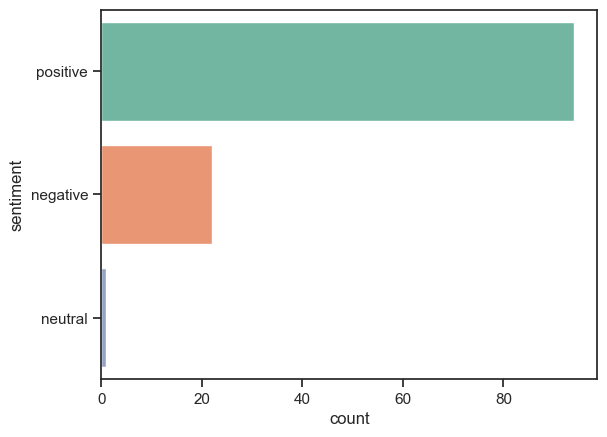

In [1617]:
#Visualize data 
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
# count plot on single categorical variable of 'sentiment'
import seaborn as sns

sns.countplot(y='sentiment',  data=df, palette="Set2")